# Challenge
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[22,10]
pd.set_option('display.max_columns',50)

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [9]:
# combine the data
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(783667, 12)

In [10]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:>

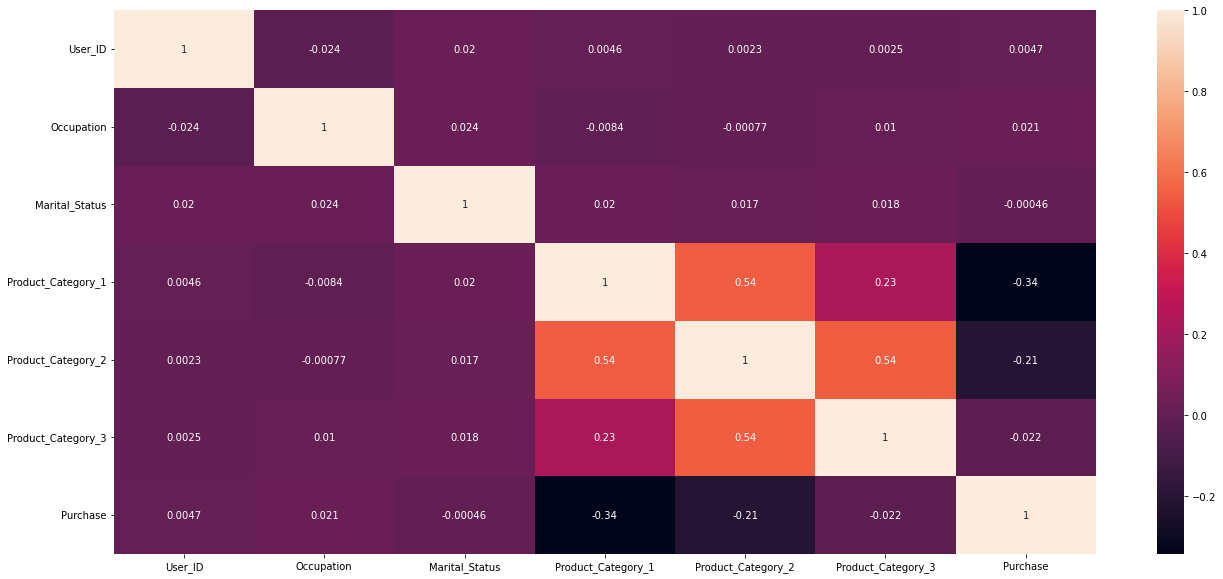

In [12]:
# Correlation
sns.heatmap(combined.corr(),annot=True)

# no correlation with target

In [13]:
combined.describe(include='all')

# Popular product is : P00265242
# Frequency buying is More in Males
# Most Buying is coming from city cat B
# On an avg people stay for 1 year in the current city
# Min purchase is of 12 dollars max purchase is 23961

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


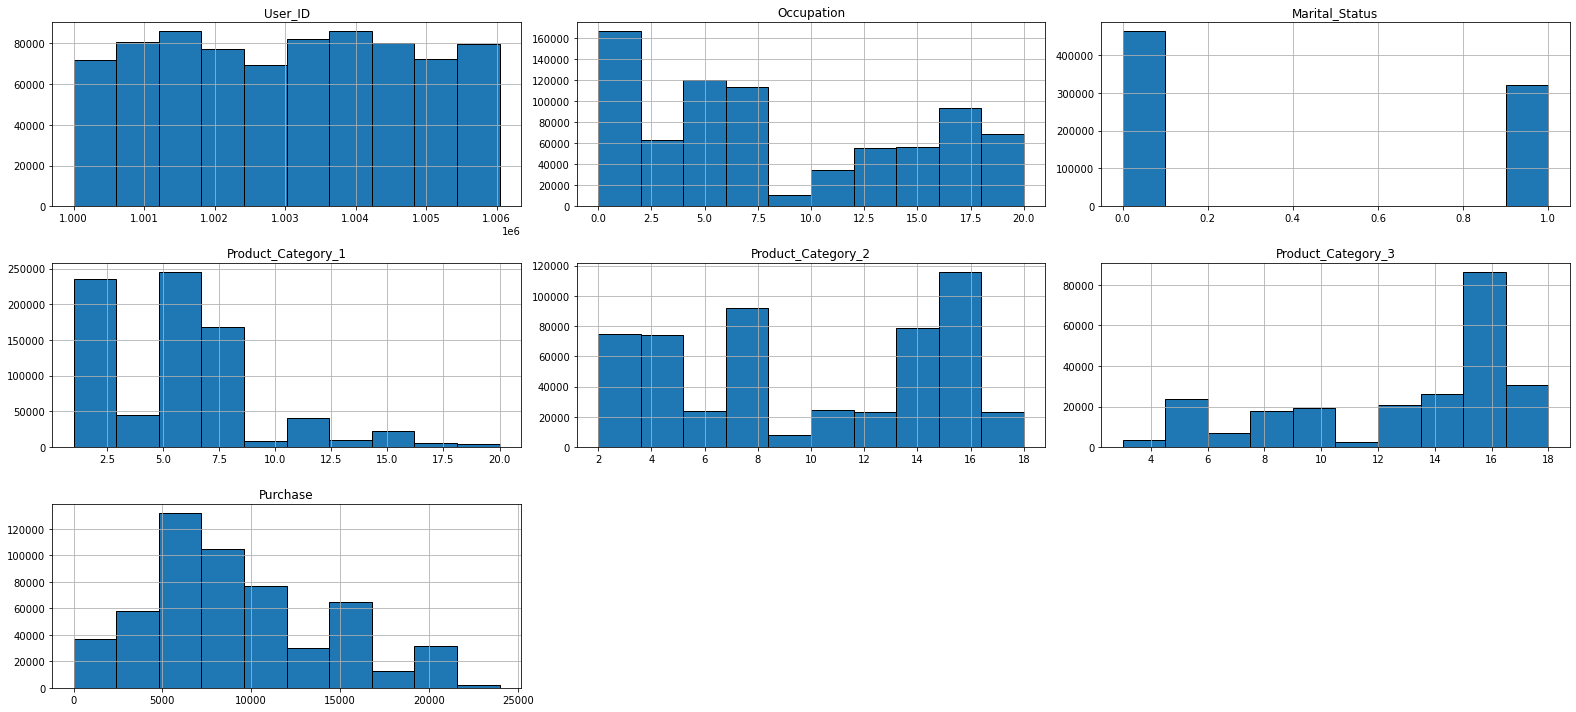

In [14]:
combined.hist(edgecolor='black')
plt.tight_layout()
plt.show()

In [15]:
# Cat vars
combined.select_dtypes(include='object').columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742'], dtype='object')


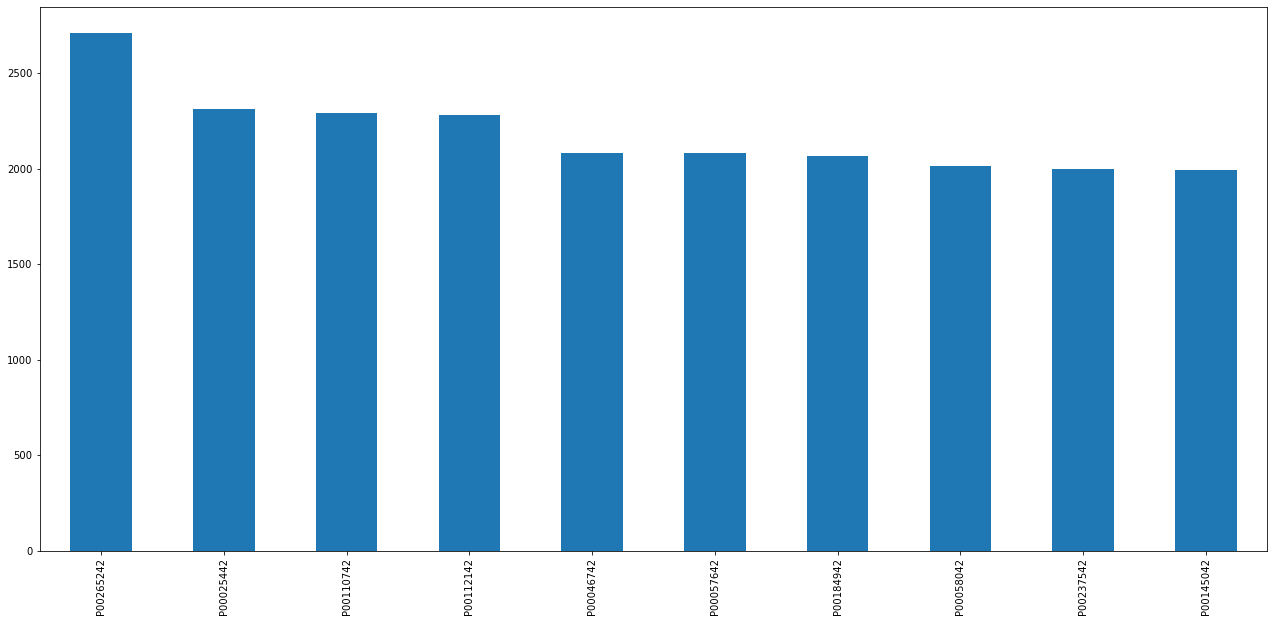

In [16]:
print(combined.Product_ID.value_counts()[:5].index)
combined.Product_ID.value_counts()[:10].plot(kind='bar')
plt.show()

In [17]:
prods=['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742']
def prod_cat(x):
    if x in prods:
        return('Top5')
    else:
        return('Others')
combined['Product_Cat']= combined.Product_ID.apply(prod_cat)

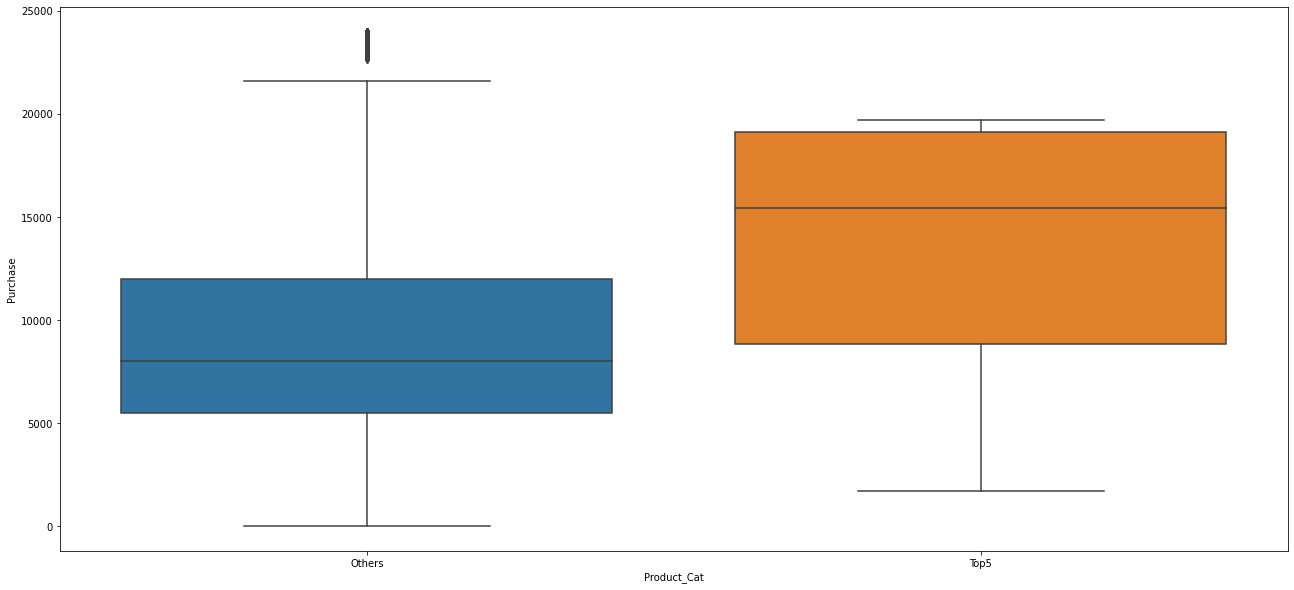

In [18]:
sns.boxplot(combined.Product_Cat,combined.Purchase)
plt.show()

# There is a decent pattern

<AxesSubplot:>

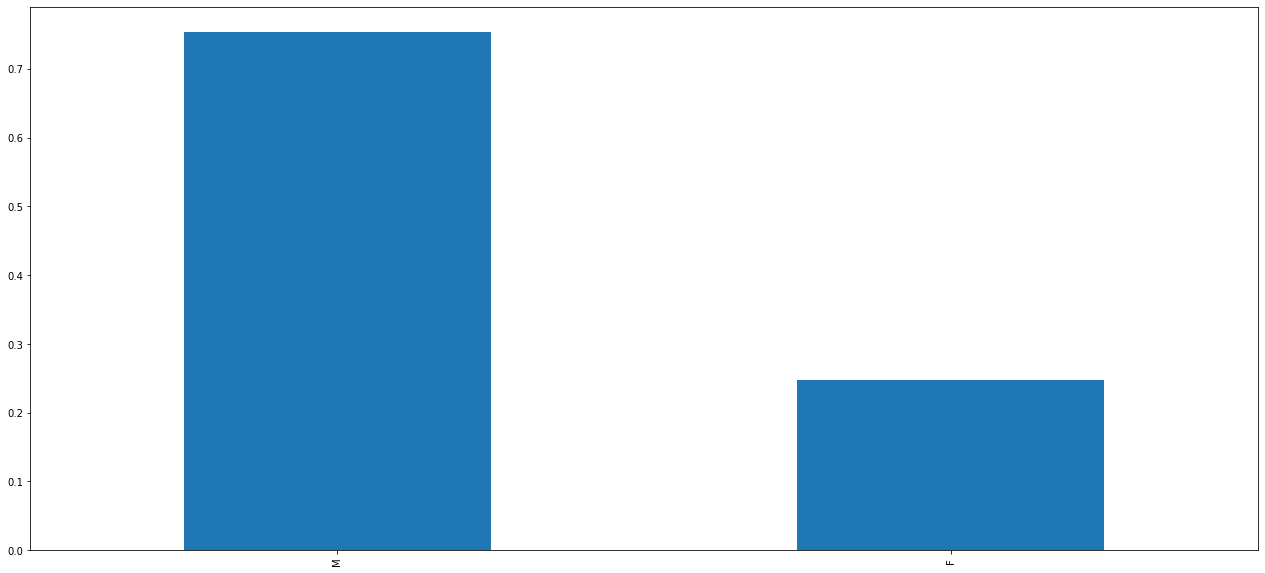

In [19]:
# Gender 
combined.Gender.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

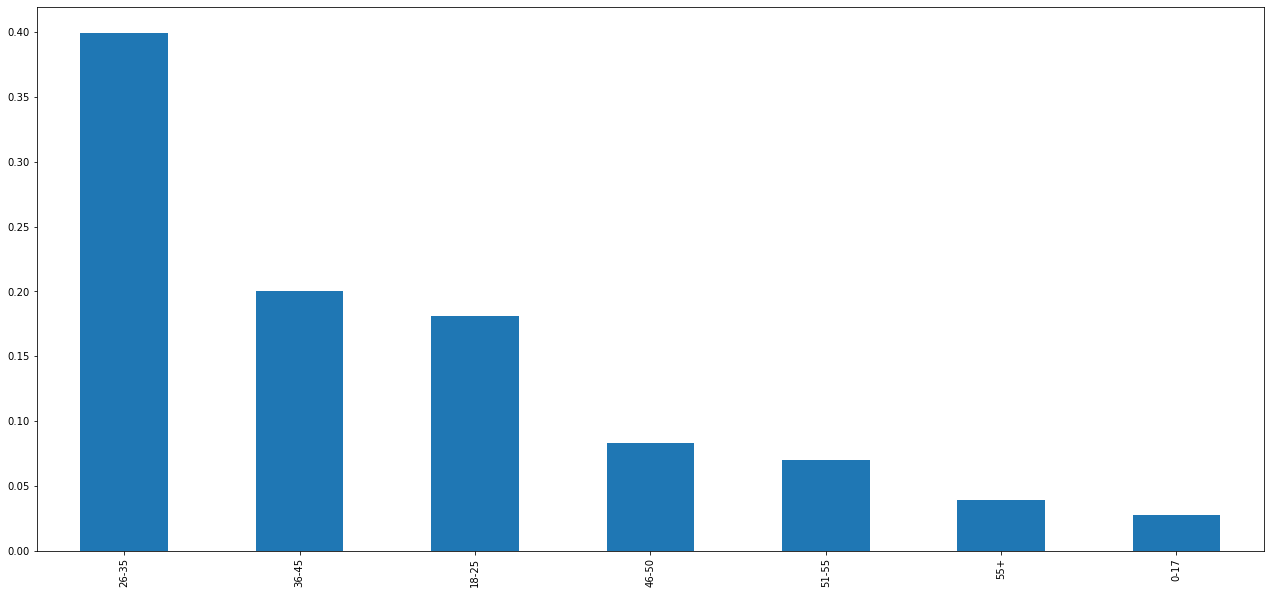

In [20]:
# Age 
combined.Age.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

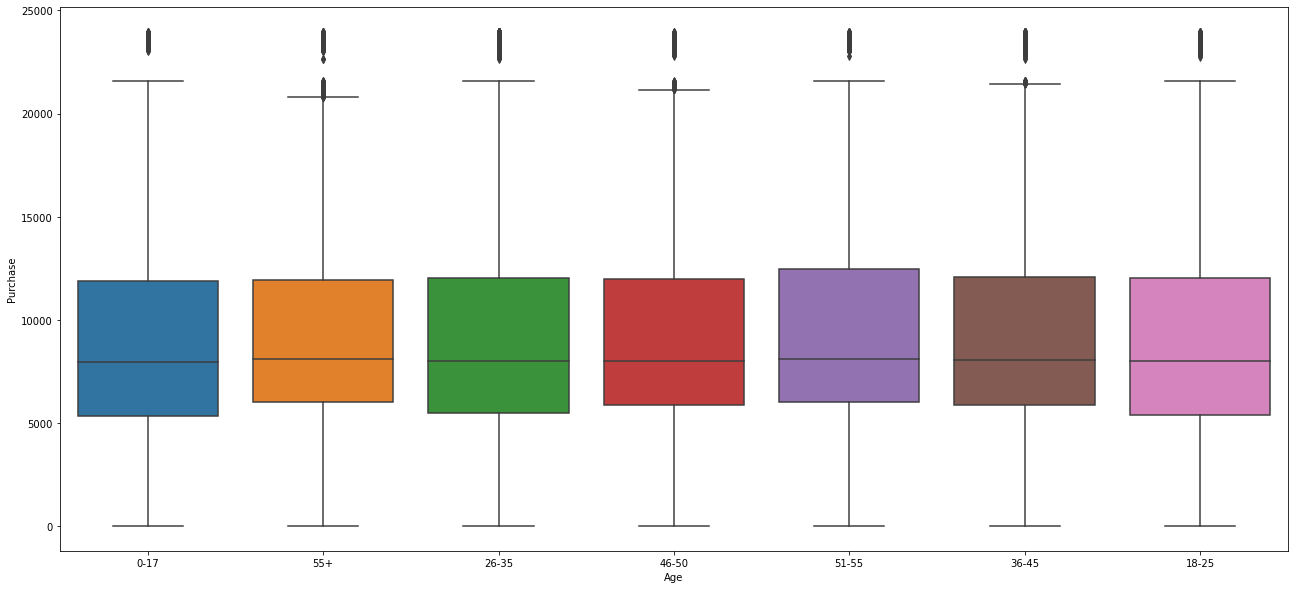

In [21]:
sns.boxplot(combined.Age,combined.Purchase)

In [22]:
# Age into Numbers
combined.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
combined[['Age1','Age2']]=combined.Age.str.split('-',expand=True)

In [24]:
combined.Age1.unique()

array(['0', '55+', '26', '46', '51', '36', '18'], dtype=object)

In [25]:
combined['Age1']=combined.Age1.str.strip('+').astype(float)

In [26]:
combined.Age1.unique()

array([ 0., 55., 26., 46., 51., 36., 18.])

In [27]:
combined.Age2.unique()

array(['17', None, '35', '50', '55', '45', '25'], dtype=object)

combined.loc[com

In [28]:
combined.loc[combined.Age2.isnull(),'Age1'].unique()

array([55.])

In [29]:
# Remove None
combined.loc[combined.Age2.isnull(),'Age2']=55

In [30]:
# Removing 0
combined.loc[combined.Age1==0,'Age1']=17

In [31]:
# Avg Age
combined['Avg_Age']=combined.loc[:,['Age1','Age2']].mean(axis=1)

<AxesSubplot:>

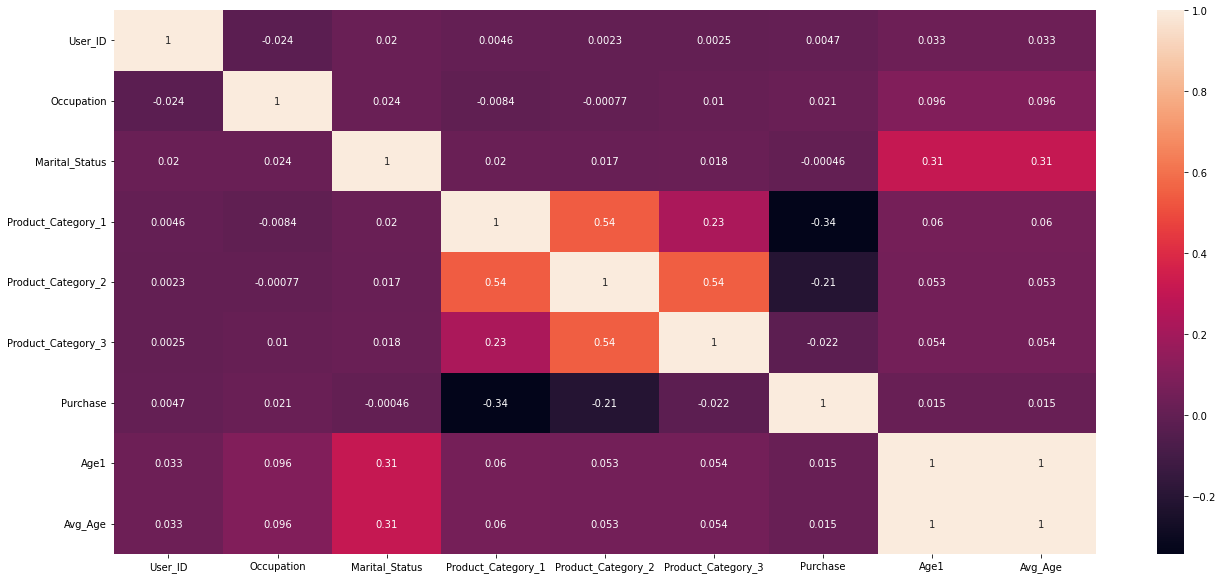

In [32]:
sns.heatmap(combined.corr(),annot=True)


<AxesSubplot:xlabel='Avg_Age', ylabel='Purchase'>

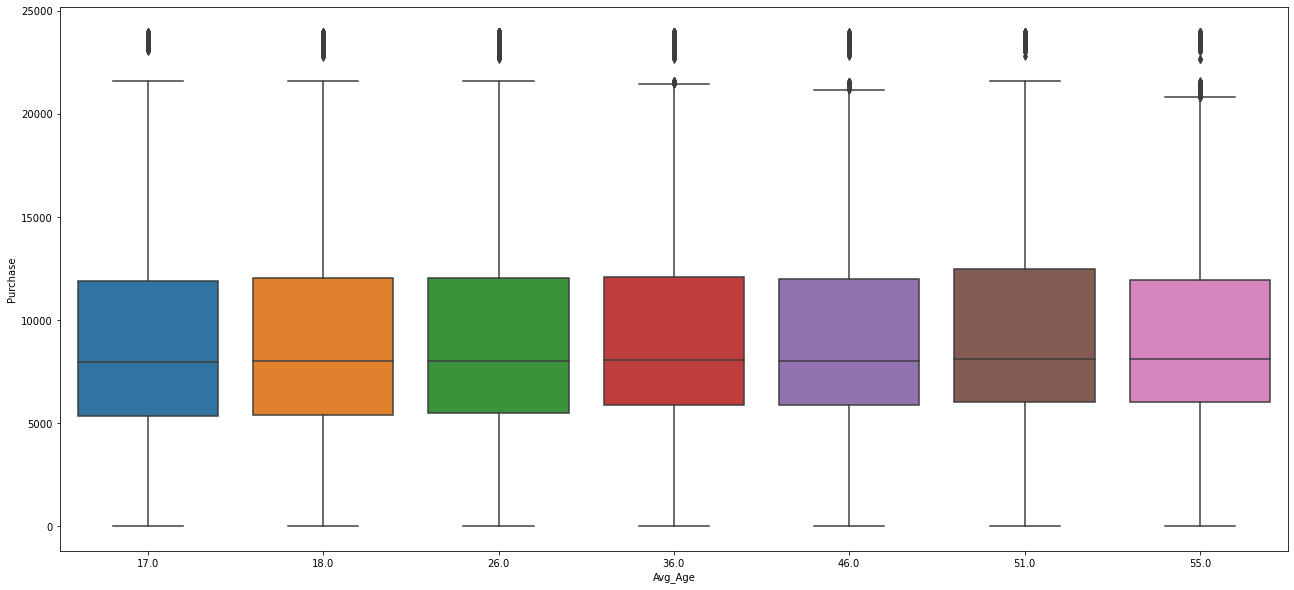

In [33]:
sns.boxplot(combined.Avg_Age,combined.Purchase)

In [34]:
import scipy.stats as stats

teststasts,pvalue=stats.ttest_ind(combined.Avg_Age,combined.Purchase)
teststasts,pvalue

(nan, nan)

In [35]:
# Stay in current city
combined.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [36]:
combined['Stay_In_Current_City_Years']=combined['Stay_In_Current_City_Years'].str.strip('+').astype(int)

In [37]:
combined.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

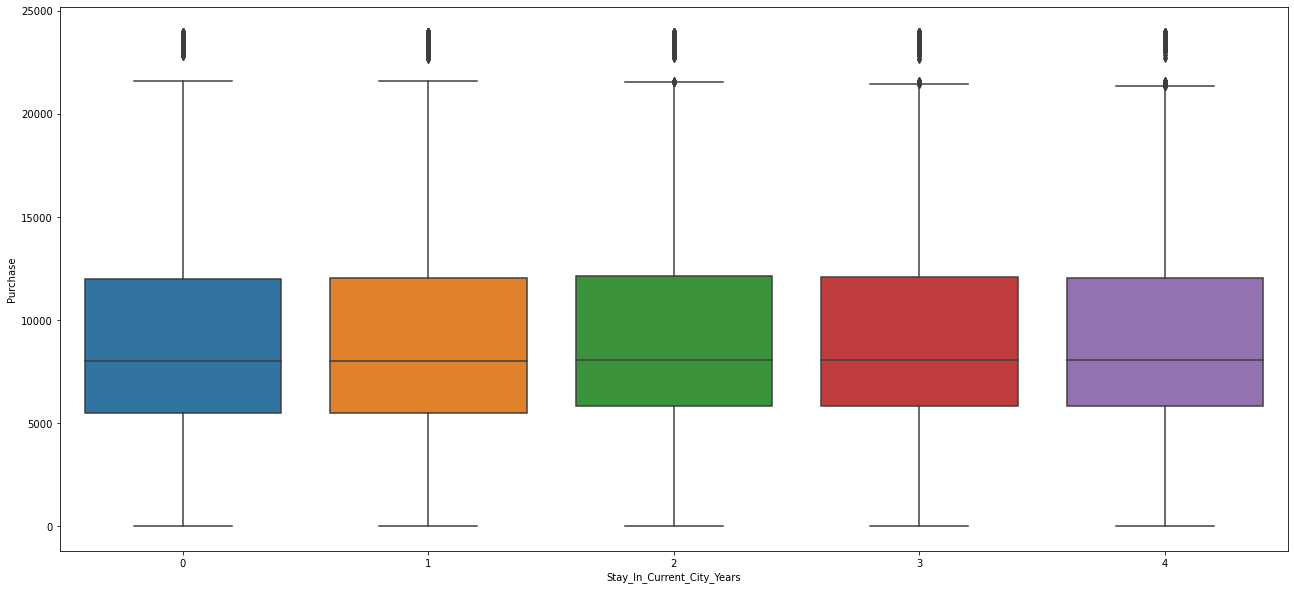

In [38]:
sns.boxplot(combined.Stay_In_Current_City_Years,combined.Purchase)

In [39]:
# Product_Category_1
combined.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [40]:
combined.Product_Category_1.value_counts(normalize=True)

5     0.275563
1     0.256102
8     0.207096
11    0.043947
2     0.043457
6     0.037422
3     0.036739
4     0.021382
16    0.017779
15    0.011464
13    0.010119
10    0.009408
12    0.007159
7     0.006820
18    0.005661
20    0.003254
14    0.002789
19    0.002046
17    0.001022
9     0.000771
Name: Product_Category_1, dtype: float64

In [41]:
# Product_Category_2
combined.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [42]:
# Product_Category_3
combined.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [43]:
def prod_cat(x):
    if x in [5,8,1]:
        return('Top3')
    else:
        return('Others')

In [44]:
combined['Prod1']=combined.Product_Category_1.apply(prod_cat)

<AxesSubplot:xlabel='Prod1', ylabel='Purchase'>

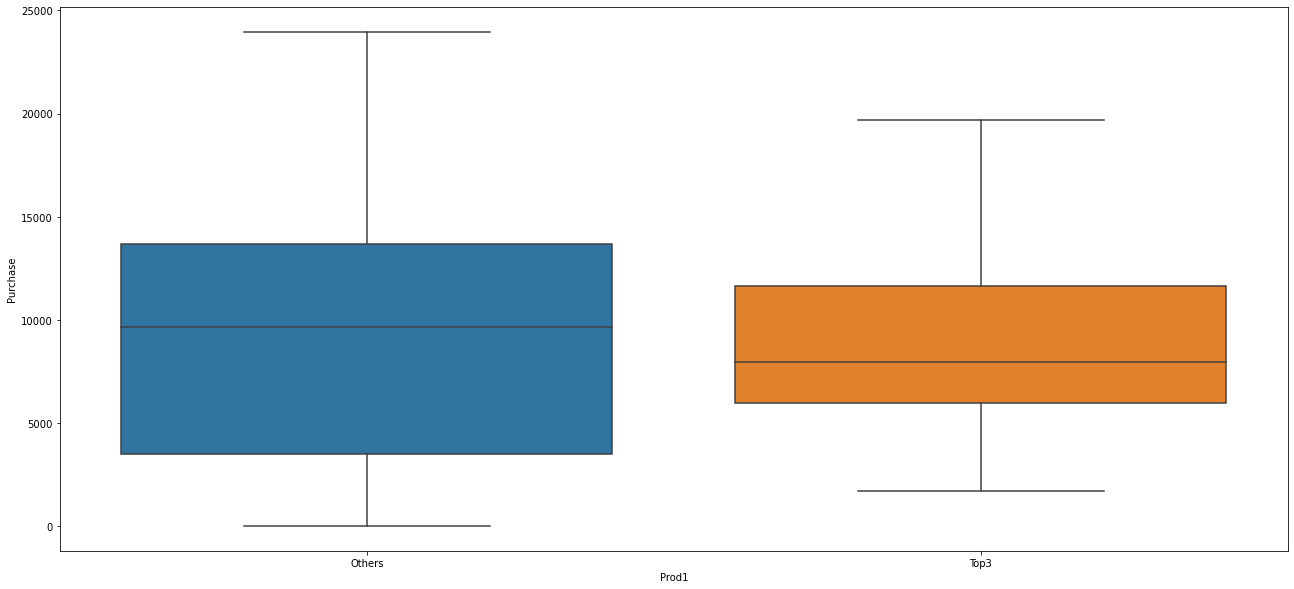

In [45]:
sns.boxplot(combined.Prod1,combined.Purchase)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

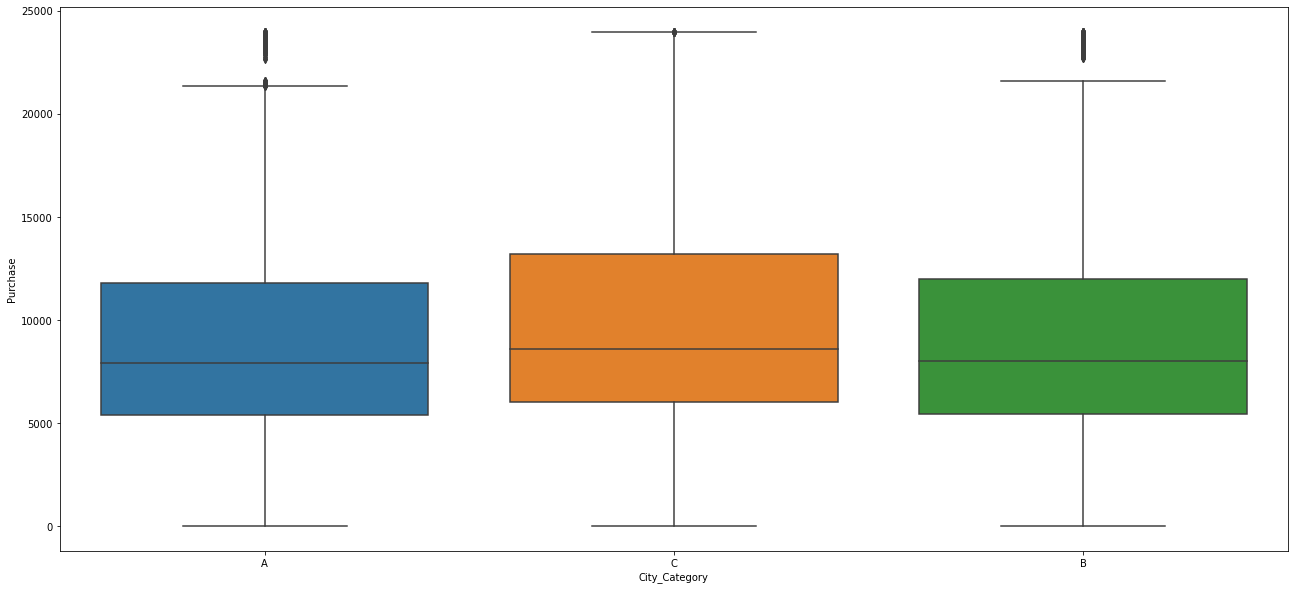

In [46]:
# City Category
sns.boxplot(combined.City_Category,combined.Purchase)

In [47]:
combined.groupby('City_Category')['Purchase'].describe().T

City_Category,A,B,C
count,147720.000000,231173.000000,171175.000000
mean,8911.939216,9151.300563,9719.920993
std,4892.115238,4955.496566,5189.465121
min,12.000000,12.000000,12.000000
25%,5403.000000,5460.000000,6031.500000
50%,7931.000000,8005.000000,8585.000000
75%,11786.000000,11986.000000,13197.000000
max,23961.000000,23960.000000,23961.000000


In [48]:
# When there is no correlation we transform --(min,max,mean,median,std)
# not use min,max because same values

In [49]:
# Take city category and create the mean of purchase n median of purchase
combined['Mean_tgt_City_Wise']=combined.groupby('City_Category')['Purchase'].transform('mean')

In [50]:
combined['Median_tgt_City_Wise']=combined.groupby('City_Category')['Purchase'].transform('median')

In [51]:
combined['Std_tgt_City_Wise']=combined.groupby('City_Category')['Purchase'].transform('std')

In [52]:
# Count of Users Basis Product
combined['Prod_Wise_User_Count']=combined.groupby('Product_ID')['User_ID'].transform('nunique')

In [53]:
# Product and product category 1 user count
combined['prod_Cat1_User_Count']=combined.groupby(['Product_Category_1'])['User_ID'].transform('nunique')

In [54]:
## Purchase stats basis Product id 
combined['Mean_tgt_Prod_ID']=combined.groupby('Product_ID')['Purchase'].transform('mean')
combined['Median_tgt_Prod_ID']=combined.groupby('Product_ID')['Purchase'].transform('median')
combined['Std_tgt_Prod_ID']=combined.groupby('Product_ID')['Purchase'].transform('std')
combined['Min_tgt_Prod_ID']=combined.groupby('Product_ID')['Purchase'].transform('min')
combined['Max_tgt_Prod_ID']=combined.groupby('Product_ID')['Purchase'].transform('max')

In [55]:
## Purchase stats basis user id 
combined['Magic1']=combined.groupby('User_ID')['Purchase'].transform('mean')
combined['Magic2']=combined.groupby('User_ID')['Purchase'].transform('median')
combined['Magic3']=combined.groupby('User_ID')['Purchase'].transform('std')
combined['Magic4']=combined.groupby('User_ID')['Purchase'].transform('min')
combined['Magic5']=combined.groupby('User_ID')['Purchase'].transform('max')

<AxesSubplot:>

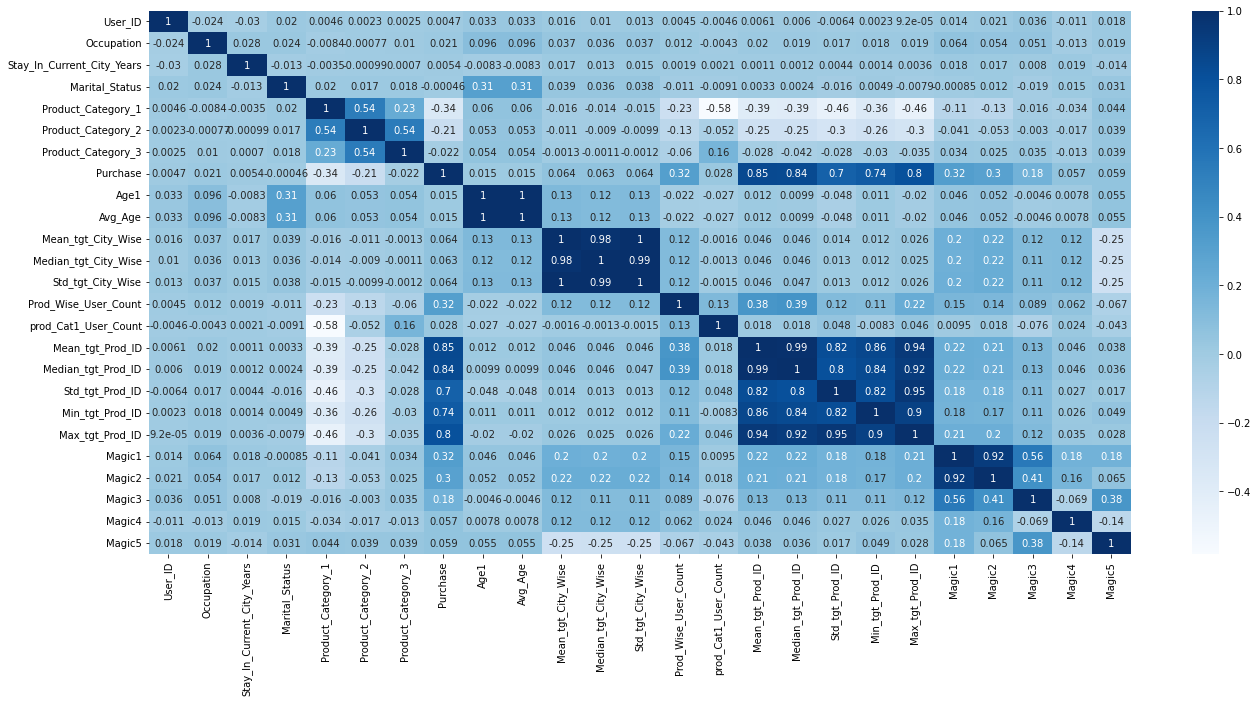

In [56]:
sns.heatmap(combined.corr(),annot=True,cmap='Blues')

In [57]:
combined.shape

(783667, 32)

In [58]:
combined.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_Age,Prod1,Mean_tgt_City_Wise,Median_tgt_City_Wise,Std_tgt_City_Wise,Prod_Wise_User_Count,prod_Cat1_User_Count,Mean_tgt_Prod_ID,Median_tgt_Prod_ID,Std_tgt_Prod_ID,Min_tgt_Prod_ID,Max_tgt_Prod_ID,Magic1,Magic2,Magic3,Magic4,Magic5
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0,Others,8911.939216,7931.0,4892.115238,344,4195,11870.863436,13265.0,2205.413246,2648.0,13716.0,9545.514286,9946.0,4639.871552,612.0,19219.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0,Top3,8911.939216,7931.0,4892.115238,845,5836,16304.030981,15812.0,3340.288874,3880.0,19701.0,9545.514286,9946.0,4639.871552,612.0,19219.0


In [59]:
combined['Prod_Age_Bins']=combined.groupby('Product_ID')['Age1'].transform('nunique')

<AxesSubplot:>

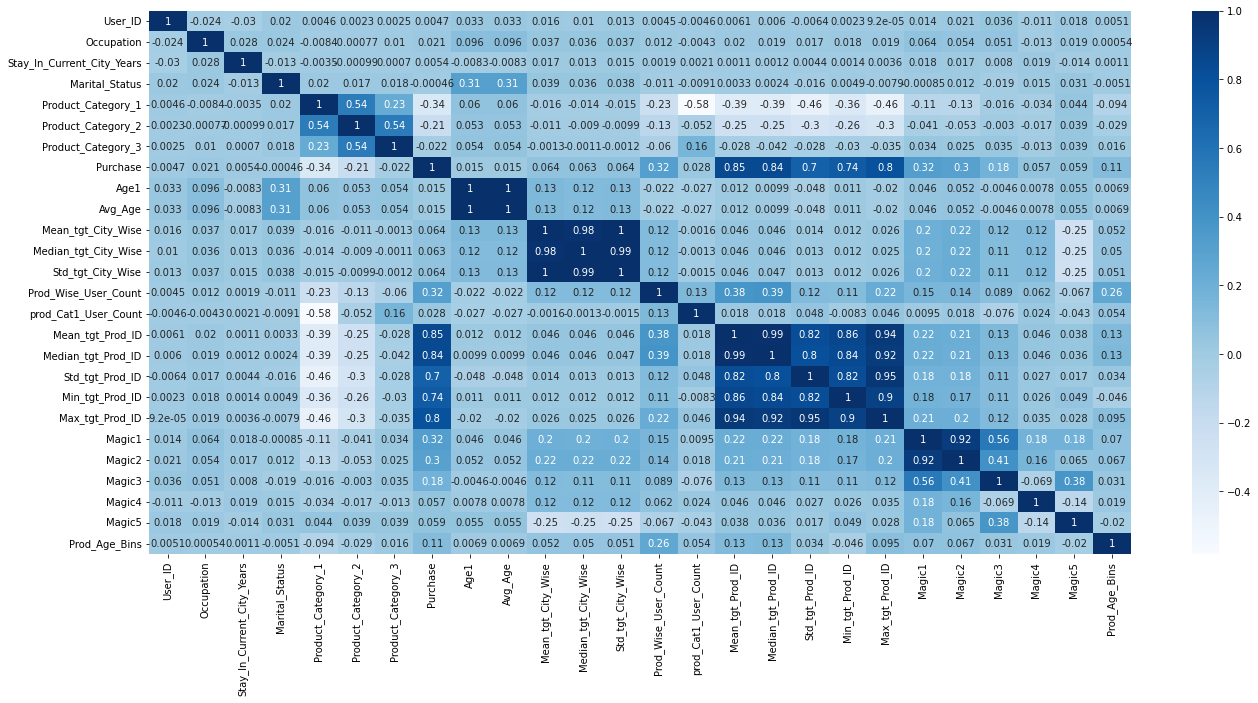

In [60]:
sns.heatmap(combined.corr(),annot=True,cmap='Blues')

In [61]:
combined.Occupation.value_counts(normalize=True)

4     0.131543
0     0.126138
7     0.107350
1     0.086372
17    0.073268
20    0.061046
12    0.056718
14    0.049488
2     0.048485
16    0.046094
6     0.037136
3     0.032062
10    0.023357
5     0.022169
15    0.022147
11    0.021174
19    0.015209
13    0.014104
18    0.011953
9     0.011394
8     0.002793
Name: Occupation, dtype: float64

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

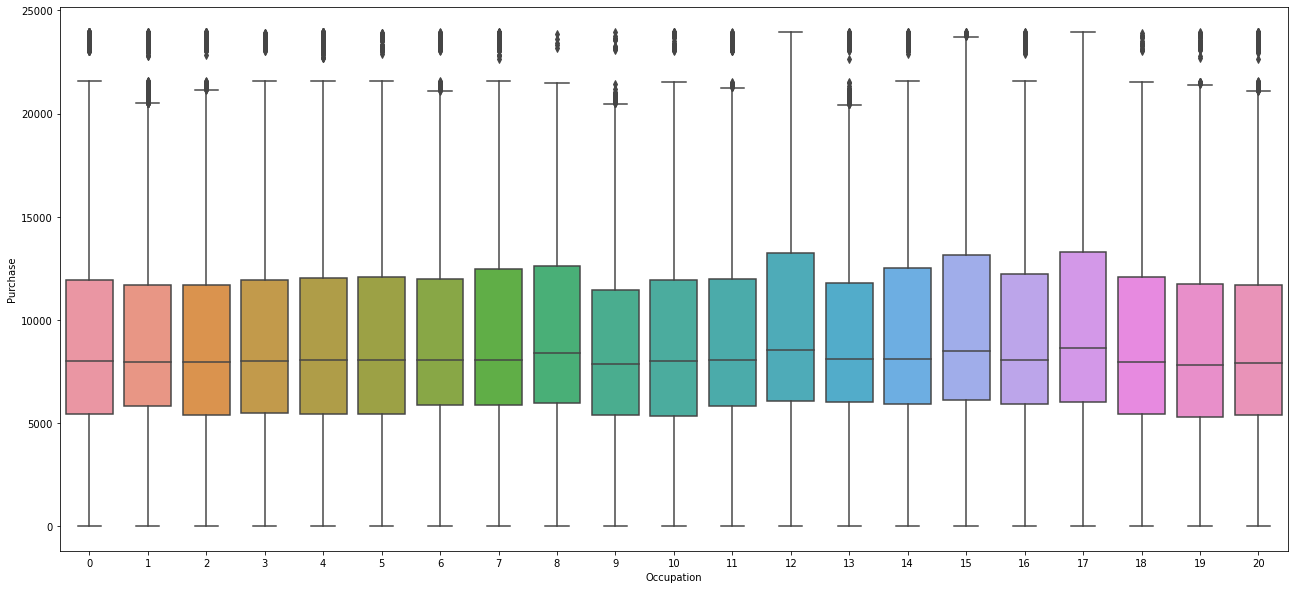

In [62]:
sns.boxplot(combined.Occupation,combined.Purchase)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

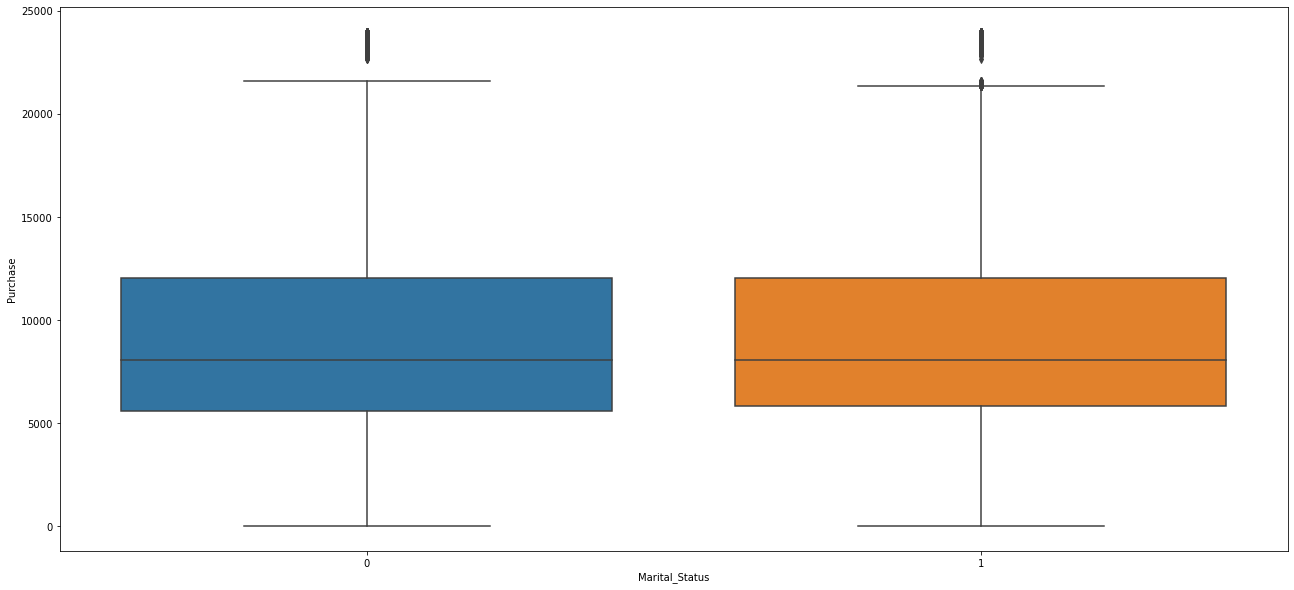

In [63]:
sns.boxplot(combined.Marital_Status,combined.Purchase)

In [64]:
combined.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_Age,Prod1,Mean_tgt_City_Wise,Median_tgt_City_Wise,Std_tgt_City_Wise,Prod_Wise_User_Count,prod_Cat1_User_Count,Mean_tgt_Prod_ID,Median_tgt_Prod_ID,Std_tgt_Prod_ID,Min_tgt_Prod_ID,Max_tgt_Prod_ID,Magic1,Magic2,Magic3,Magic4,Magic5,Prod_Age_Bins
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0,Others,8911.939216,7931.0,4892.115238,344,4195,11870.863436,13265.0,2205.413246,2648.0,13716.0,9545.514286,9946.0,4639.871552,612.0,19219.0,7
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0,Top3,8911.939216,7931.0,4892.115238,845,5836,16304.030981,15812.0,3340.288874,3880.0,19701.0,9545.514286,9946.0,4639.871552,612.0,19219.0,7


In [65]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_Cat',
       'Age1', 'Age2', 'Avg_Age', 'Prod1', 'Mean_tgt_City_Wise',
       'Median_tgt_City_Wise', 'Std_tgt_City_Wise', 'Prod_Wise_User_Count',
       'prod_Cat1_User_Count', 'Mean_tgt_Prod_ID', 'Median_tgt_Prod_ID',
       'Std_tgt_Prod_ID', 'Min_tgt_Prod_ID', 'Max_tgt_Prod_ID', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Prod_Age_Bins'],
      dtype='object')

In [66]:
# Drop the variables
new=combined.drop(['User_ID', 'Product_ID','Age1','Age2','Product_Category_2','Product_Category_3'],axis=1)

In [67]:
new.shape

(783667, 27)

## Missing Values


In [68]:
new.isnull().sum()[combined.isnull().sum()!=0]

Purchase              233599
Mean_tgt_Prod_ID          61
Median_tgt_Prod_ID        61
Std_tgt_Prod_ID          272
Min_tgt_Prod_ID           61
Max_tgt_Prod_ID           61
dtype: int64

In [69]:
new.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Product_Cat', 'Avg_Age', 'Prod1', 'Mean_tgt_City_Wise',
       'Median_tgt_City_Wise', 'Std_tgt_City_Wise', 'Prod_Wise_User_Count',
       'prod_Cat1_User_Count', 'Mean_tgt_Prod_ID', 'Median_tgt_Prod_ID',
       'Std_tgt_Prod_ID', 'Min_tgt_Prod_ID', 'Max_tgt_Prod_ID', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Prod_Age_Bins'],
      dtype='object')

In [70]:
val = new.Min_tgt_Prod_ID.median()
new.loc[new.Min_tgt_Prod_ID.isnull(),'Min_tgt_Prod_ID']=val

val1=new.Mean_tgt_Prod_ID.median()
new.loc[new.Mean_tgt_Prod_ID.isnull(),'Mean_tgt_Prod_ID']=val1

val2=new.Median_tgt_Prod_ID.median()
new.loc[new.Median_tgt_Prod_ID.isnull(),'Median_tgt_Prod_ID']=val2

val3=new.Max_tgt_Prod_ID.median()
new.loc[new.Max_tgt_Prod_ID.isnull(),'Max_tgt_Prod_ID']=val3

val4=new.Std_tgt_Prod_ID.median()
new.loc[new.Std_tgt_Prod_ID.isnull(),'Std_tgt_Prod_ID']=val4

In [71]:
new.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                      233599
Product_Cat                        0
Avg_Age                            0
Prod1                              0
Mean_tgt_City_Wise                 0
Median_tgt_City_Wise               0
Std_tgt_City_Wise                  0
Prod_Wise_User_Count               0
prod_Cat1_User_Count               0
Mean_tgt_Prod_ID                   0
Median_tgt_Prod_ID                 0
Std_tgt_Prod_ID                    0
Min_tgt_Prod_ID                    0
Max_tgt_Prod_ID                    0
Magic1                             0
Magic2                             0
Magic3                             0
Magic4                             0
Magic5                             0
Prod_Age_Bins                      0
d

## Split the Data 


In [72]:
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]
newtrain.shape,newtest.shape,train.shape,test.shape

((550068, 27), (233599, 27), (550068, 12), (233599, 11))

In [73]:
# Drop Purchase from newtest
newtest.drop(['Purchase','Age'],axis=1,inplace=True)
newtrain.drop('Age',axis=1,inplace=True)

In [74]:
newtrain.shape,newtest.shape,train.shape,test.shape

((550068, 26), (233599, 25), (550068, 12), (233599, 11))

## Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=newtrain.drop('Purchase',axis=1)
y=newtrain.Purchase

In [76]:
# X.select_dtypes(include=np.number).columns
num_cols=['Avg_Age', 'Mean_tgt_City_Wise',
       'Median_tgt_City_Wise', 'Std_tgt_City_Wise', 'Prod_Wise_User_Count',
       'prod_Cat1_User_Count', 'Mean_tgt_Prod_ID', 'Median_tgt_Prod_ID',
       'Std_tgt_Prod_ID', 'Min_tgt_Prod_ID', 'Max_tgt_Prod_ID', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5']

In [77]:
for i in num_cols:
    newtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i]=ss.transform(pd.DataFrame(newtest.loc[:,i]))    

In [78]:
newtest.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Cat,Avg_Age,Prod1,Mean_tgt_City_Wise,Median_tgt_City_Wise,Std_tgt_City_Wise,Prod_Wise_User_Count,prod_Cat1_User_Count,Mean_tgt_Prod_ID,Median_tgt_Prod_ID,Std_tgt_Prod_ID,Min_tgt_Prod_ID,Max_tgt_Prod_ID,Magic1,Magic2,Magic3,Magic4,Magic5,Prod_Age_Bins
550068,M,7,B,2,1,1,Others,1.382167,Top3,-0.350536,-0.566605,-0.455480,1.341961,0.553362,1.527020,1.368202,1.081336,1.009414,1.195243,3.386054,3.876538,1.619927,0.029026,-0.881594,7
550069,M,17,C,0,0,3,Others,-0.442315,Others,1.418572,1.479449,1.454773,-0.520606,-1.029085,0.581716,0.578415,-0.385944,0.327519,0.125240,0.604577,0.693828,-0.036746,-0.496471,-0.588507,7
550070,F,1,B,4,1,5,Others,0.469926,Top3,-0.350536,-0.566605,-0.455480,-0.818772,0.536968,-0.827723,-0.920797,-0.607089,-0.742325,-0.734119,0.286986,0.215979,-0.548806,-0.673173,-0.248327,7
550071,F,1,B,4,1,4,Others,0.469926,Others,-0.350536,-0.566605,-0.455480,-1.194383,-1.358882,-1.715299,-1.651946,-1.666590,-1.476000,-1.693444,0.286986,0.215979,-0.548806,-0.673173,-0.248327,6
550072,F,1,C,1,0,4,Others,-0.442315,Others,1.418572,1.479449,1.454773,0.273211,-1.358882,-1.564797,-1.496316,-1.576422,-1.578762,-1.688088,-0.806724,-0.705606,-0.184942,-0.524129,-0.640111,7


## Encoding

In [79]:
dummytrain=pd.get_dummies(X,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [80]:
dummytrain.shape,dummytest.shape

((550068, 26), (233599, 26))

## Modelling

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor

In [88]:
lr = LinearRegression()
rf = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
etr = ExtraTreeRegressor()
xgb = XGBRegressor()
kfold = KFold(n_splits=5,shuffle=True, random_state=42)

In [85]:
predlr = []
predrf = []
predabr = []
predgbr = []
preddtr = []
predetr = []
predxgb = []

# Linear Regression

In [93]:
for tri, tti in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[tri]
    ytrain = y.iloc[tri]
    predlr.append(lr.fit(xtrain,ytrain).predict(dummytrain))
    
finalpred = pd.DataFrame(predlr).T.mean(axis=1)

sub = pd.DataFrame({"Purchase": finalpred,
                   "User_ID": test.User_ID,
                   "Product_ID": test.Product_ID})

In [94]:
sub.to_csv("BFridayLRModel.csv", index = False)

# Random Forest Model

In [91]:
for tri, tti in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[tri]
    ytrain = y.iloc[tri]
    predrf.append(rf.fit(xtrain,ytrain).predict(dummytrain))
    
finalpred = pd.DataFrame(predlr).T.mean(axis=1)

sub = pd.DataFrame({"Purchase": finalpred,
                   "User_ID": test.User_ID,
                   "Product_ID": test.Product_ID})

In [92]:
sub.to_csv("BFridayRFModel.csv", index = False)

# Gradient Boosting Model

In [95]:
for tri, tti in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[tri]
    ytrain = y.iloc[tri]
    predrf.append(gbr.fit(xtrain,ytrain).predict(dummytrain))
    
finalpred = pd.DataFrame(predgbr).T.mean(axis=1)

sub = pd.DataFrame({"Purchase": finalpred,
                   "User_ID": test.User_ID,
                   "Product_ID": test.Product_ID})

In [ ]:
sub.to_csv("BFridayGBMModel.csv", index = False)